# 🏞 Convolutional Neural Network

In this notebook, we'll walk through the steps required to train your own convolutional neural network (CNN) on the CIFAR dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

2024-02-21 23:55:10.641078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def sample_batch(dataset):
    batch = dataset.take(1).get_single_element()
    if isinstance(batch, tuple):
        batch = batch[0]
    return batch.numpy()


def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

## 0. Parameters <a name="parameters"></a>

In [4]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [6]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

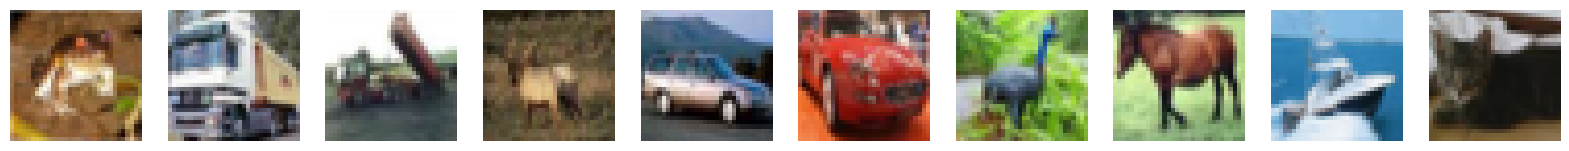

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [7]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [10]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# dense layers 
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

2024-02-22 00:01:11.776597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Total params: 122,570
Trainable params: 122,570
Non-trainable params: 0
_________________________________________________________________


In [24]:
# input_layer = layers.Input((32, 32, 3))

# x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
#     input_layer
# )
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)

# x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)

# x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)

# x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)

# x = layers.Flatten()(x)

# x = layers.Dense(128)(x)
# x = layers.BatchNormalization()(x)
# x = layers.LeakyReLU()(x)
# x = layers.Dropout(rate=0.5)(x)

# x = layers.Dense(NUM_CLASSES)(x)
# output_layer = layers.Activation("softmax")(x)

# model = models.Model(input_layer, output_layer)

# model.summary()


## 3. Train the model <a name="train"></a>

In [11]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [12]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.5828 - accuracy: 0.4241 - val_loss: 1.3543 - val_accuracy: 0.5150
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.2488 - accuracy: 0.5559 - val_loss: 1.1534 - val_accuracy: 0.5895
Epoch 3/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.0972 - accuracy: 0.6137 - val_loss: 1.0399 - val_accuracy: 0.6333
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9915 - accuracy: 0.6517 - val_loss: 0.9858 - val_accuracy: 0.6565
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9139 - accuracy: 0.6833 - val_loss: 0.9423 - val_accuracy: 0.6695
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8545 - accuracy: 0.7029 - val_loss: 0.9380 - val_accuracy: 0.6757
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8034 - accuracy: 0.7212 - val_loss: 0.8552 -

## 4. Evaluation <a name="evaluate"></a>

In [13]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 3s 227ms/step - loss: 0.8625 - accuracy: 0.6975


[0.862450897693634, 0.6974999904632568]

In [14]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 3s 9ms/step


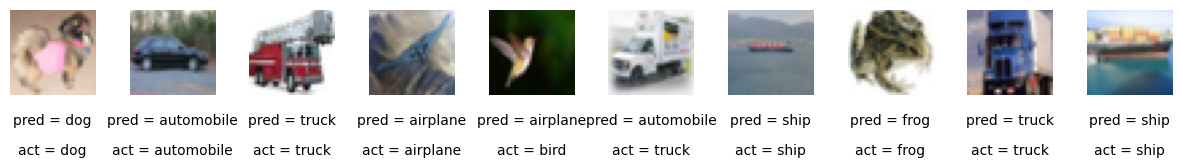

In [15]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)